In [1]:
import pandas as pd
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Downloading the Data from Yahoo Finance Site

df = yf.download('AAPL', start='2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
# Previous index was Date, Resetting it to default

df.reset_index(inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449394,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735306,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314880,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970078,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,74.143906,132079200


## Technical Analysis

In [4]:
import ta

In [5]:
# Applying Relative Strength Index

df['rsi'] = ta.momentum.RSIIndicator(close=df['Close'], window=14).rsi()

In [6]:
# Applying MACD Indicator

# Calculate 12-period EMA
ema_12 = df['Close'].ewm(span=12, adjust=False).mean()

# Calculate 26-period EMA
ema_26 = df['Close'].ewm(span=26, adjust=False).mean()

# Calculate MACD line
macd = ema_12 - ema_26

# Calculate signal line
signal = macd.ewm(span=9, adjust=False).mean()

# Calculate MACD histogram
histogram = macd - signal

# Assign MACD values to new columns in the DataFrame
df['macd'] = macd
df['signal'] = signal
df['histogram'] = histogram


In [7]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,rsi,macd,signal,histogram
813,2023-03-27,159.940002,160.770004,157.869995,158.279999,158.279999,52390300,60.729218,2.923728,2.437177,0.486551
814,2023-03-28,157.970001,158.490005,155.979996,157.649994,157.649994,45992200,59.143053,2.811817,2.512105,0.299711
815,2023-03-29,159.369995,161.050003,159.350006,160.770004,160.770004,51305700,64.138514,2.940983,2.597881,0.343102
816,2023-03-30,161.529999,162.470001,161.270004,162.360001,162.360001,49501700,66.393567,3.135504,2.705405,0.430098
817,2023-03-31,162.440002,165.000000,161.910004,164.899994,164.899994,68694700,69.674229,3.454794,2.855283,0.599511
818,2023-04-03,164.270004,166.289993,164.220001,166.169998,166.169998,56976200,71.188695,3.766891,3.037605,0.729286
819,2023-04-04,166.600006,166.839996,165.110001,165.630005,165.630005,46278300,69.597193,3.925407,3.215165,0.710242
820,2023-04-05,164.740005,165.050003,161.800003,163.759995,163.759995,51511700,64.241086,3.855692,3.343270,0.512421
821,2023-04-06,162.429993,164.960007,162.000000,164.660004,164.660004,45390100,65.612734,3.828928,3.440402,0.388526
822,2023-04-10,161.419998,162.029999,160.080002,162.029999,162.029999,47672100,58.545547,3.554523,3.463226,0.091297


In [8]:
# Applying Stochastic Oscillator

# Calculate highest high and lowest low over 14 periods
high_14 = df['High'].rolling(14).max()
low_14 = df['Low'].rolling(14).min()

# Calculate %K
k = 100 * (df['Close'] - low_14) / (high_14 - low_14)

# Calculate %D
d = k.rolling(3).mean()

# Assign %K and %D values to new columns in the DataFrame
df['%K'] = k
df['%D'] = d

In [9]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,rsi,macd,signal,histogram,%K,%D
813,2023-03-27,159.940002,160.770004,157.869995,158.279999,158.279999,52390300,60.729218,2.923728,2.437177,0.486551,73.434267,79.444810
814,2023-03-28,157.970001,158.490005,155.979996,157.649994,157.649994,45992200,59.143053,2.811817,2.512105,0.299711,69.098377,76.508359
815,2023-03-29,159.369995,161.050003,159.350006,160.770004,160.770004,51305700,64.138514,2.940983,2.597881,0.343102,90.571265,77.701303
816,2023-03-30,161.529999,162.470001,161.270004,162.360001,162.360001,49501700,66.393567,3.135504,2.705405,0.430098,99.255243,86.308295
817,2023-03-31,162.440002,165.000000,161.910004,164.899994,164.899994,68694700,69.674229,3.454794,2.855283,0.599511,99.336830,96.387779
818,2023-04-03,164.270004,166.289993,164.220001,166.169998,166.169998,56976200,71.188695,3.766891,3.037605,0.729286,99.266981,99.286351
819,2023-04-04,166.600006,166.839996,165.110001,165.630005,165.630005,46278300,69.597193,3.925407,3.215165,0.710242,92.039528,96.881113
820,2023-04-05,164.740005,165.050003,161.800003,163.759995,163.759995,51511700,64.241086,3.855692,3.343270,0.512421,75.728911,89.011807
821,2023-04-06,162.429993,164.960007,162.000000,164.660004,164.660004,45390100,65.612734,3.828928,3.440402,0.388526,82.821180,83.529873
822,2023-04-10,161.419998,162.029999,160.080002,162.029999,162.029999,47672100,58.545547,3.554523,3.463226,0.091297,55.709049,71.419713


In [10]:
# Applying On Balance Volume Indicator

df['obv'] = ta.volume.on_balance_volume(df['Close'], df['Volume'])

In [11]:
# Applying other Technical Indicators

df['H-L'] = df['High'] - df['Low']
df['O-C'] = df['Open'] - df['Close']

# Moving Averages
df['7_DAYS_MA'] = df['Close'].rolling(window=7).mean()
df['14_DAYS_MA'] = df['Close'].rolling(window=14).mean()
df['21_DAYS_MA'] = df['Close'].rolling(window=21).mean()

# Standard Deviation
df['7_DAYS_STD_DEV'] = df['Close'].rolling(window=7).std()

# 7-period Exponential Moving Average
ema_period = 7
df['ema'] = df['Close'].ewm(span=ema_period, adjust=False).mean()

# 7-Period Double Exponential Moving Average
df['dema'] = 2*df['ema'] - df['Close'].ewm(span=ema_period, adjust=False).mean()

df = df[21:]

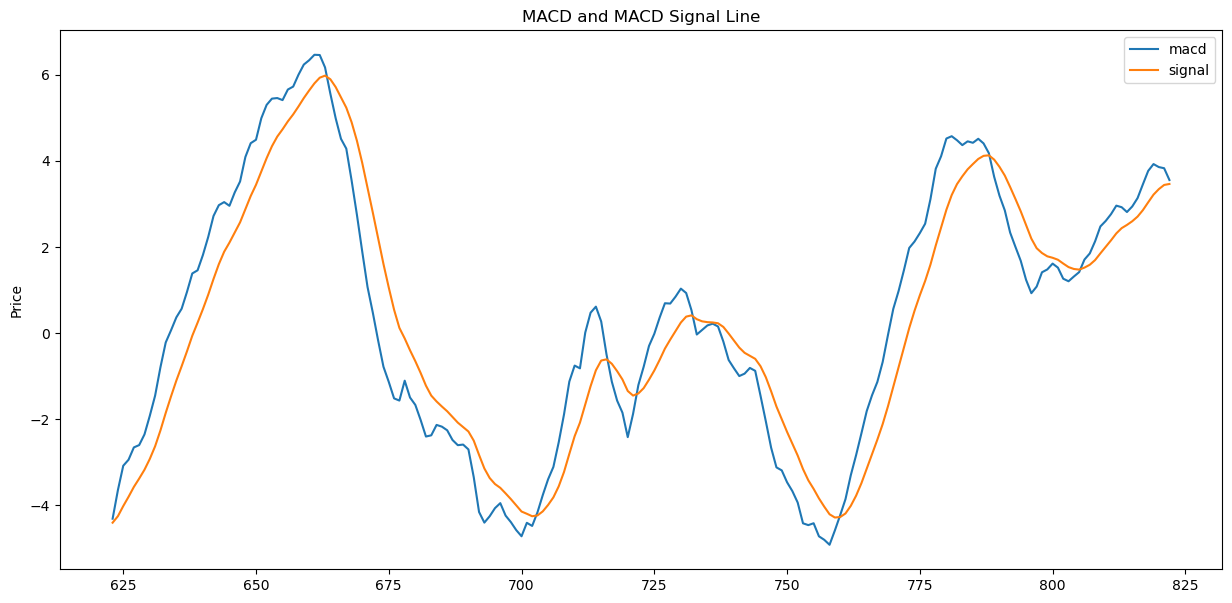

In [12]:
# Plot MACD and MACD Signal line
df[['macd','signal']][-200:].plot(figsize=(15,7))
plt.ylabel('Price')
plt.title('MACD and MACD Signal Line')
plt.show()

In [13]:
# Calculating Trading Signal
df['trading_signal_macd'] = np.nan

# Buy signals
df.loc[df['macd'] > df['signal'], 'trading_signal_macd'] = 1

# Sell signals
df.loc[df['macd'] < df['signal'], 'trading_signal_macd'] = -1

# set the value of the trading signal to 1 when the MACD histogram is positive and increasing
df.loc[(df['histogram'] > 0) & (df['histogram'] > df['histogram'].shift()), 'signal'] = 1

# set the value of the trading signal to -1 when the MACD histogram is negative and decreasing
df.loc[(df['histogram'] < 0) & (df['histogram'] < df['histogram'].shift()), 'signal'] = -1

# Fill the missing values with last valid observation
df = df.fillna(method = 'ffill')

df.tail()

C:\Users\abhia\AppData\Local\Temp\ipykernel_3628\2452831615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trading_signal_macd'] = np.nan


,Date,Open,High,Low,Close,Adj Close,Volume,rsi,macd,signal,...,obv,H-L,O-C,7_DAYS_MA,14_DAYS_MA,21_DAYS_MA,7_DAYS_STD_DEV,ema,dema,trading_signal_macd
818,2023-04-03,164.270004,166.289993,164.220001,166.169998,166.169998,56976200,71.188695,3.766891,1.000000,...,1723716500,2.069992,-1.899994,161.482856,159.118571,156.576666,3.198769,162.167140,162.167140,1.0
819,2023-04-04,166.600006,166.839996,165.110001,165.630005,165.630005,46278300,69.597193,3.925407,3.215165,...,1677438200,1.729996,0.970001,162.251428,160.021428,157.138571,3.486563,163.032856,163.032856,1.0
820,2023-04-05,164.740005,165.050003,161.800003,163.759995,163.759995,51511700,64.241086,3.855692,3.343270,...,1625926500,3.250000,0.980011,163.034284,160.586427,157.717618,3.031782,163.214641,163.214641,1.0
821,2023-04-06,162.429993,164.960007,162.000000,164.660004,164.660004,45390100,65.612734,3.828928,3.440402,...,1671316600,2.960007,-2.230011,164.035714,161.276427,158.279047,1.905367,163.575982,163.575982,1.0
822,2023-04-10,161.419998,162.029999,160.080002,162.029999,162.029999,47672100,58.545547,3.554523,3.463226,...,1623644500,1.949997,-0.610001,164.215714,161.607142,158.823809,1.576588,163.189486,163.189486,1.0


In [14]:
df['returns'] = df.Close.pct_change()

# Calculate daily strategy returns
df['strategy_returns_macd'] = df.returns * df.trading_signal_macd.shift(1)

# Calculate cumulative strategy returns
cumulative_strategy_returns = (df.strategy_returns_macd + 1).cumprod()


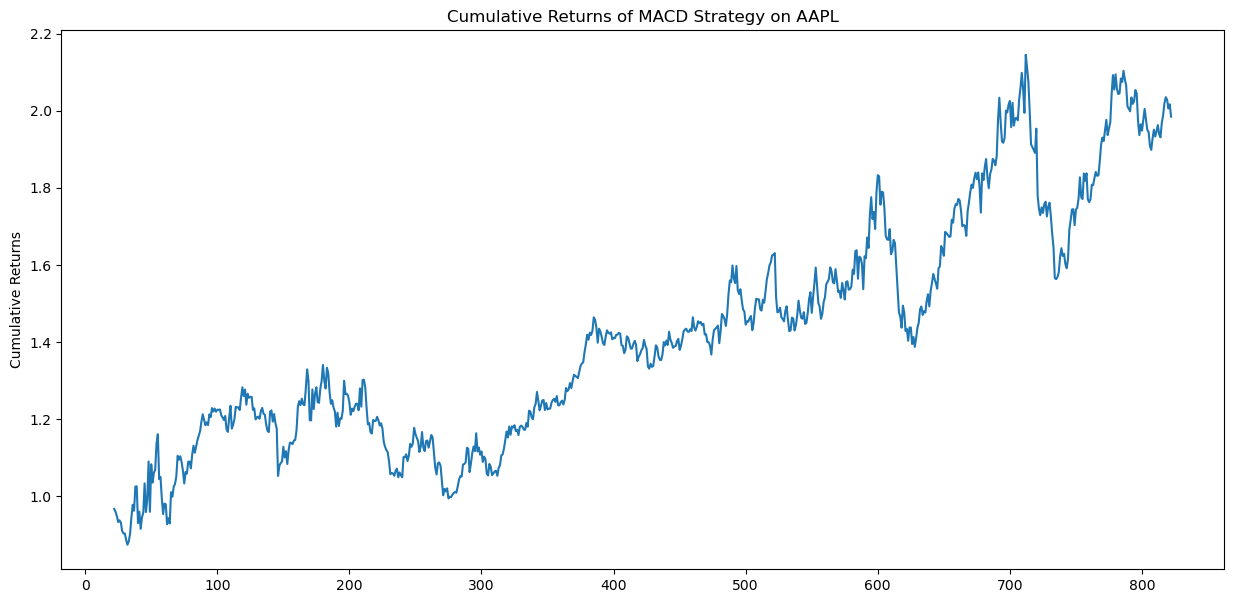

In [15]:
# Plot cumulative strategy returns
cumulative_strategy_returns.plot(figsize=(15,7))
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns of MACD Strategy on AAPL')
plt.show()

NASDAQ average about 252 trading days a year.

In [16]:
# Total number of trading days
days = len(cumulative_strategy_returns)

# Calculate compounded annual growth rate
annual_returns = (cumulative_strategy_returns.iloc[-1]**(252/days) - 1)*100

print('The CAGR is %.2f%%' % annual_returns)

The CAGR is 24.04%


## Fundamental Analysis

In [12]:
import yahoo_fin as yfin
from yahoo_fin.stock_info import get_analysts_info

## Principal Component Analysis

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>)

In [ ]:
df = scaler.transform(df)

In [ ]:
from sklearn.decomposition import PCA

In [100]:
pca = PCA(n_components=4)

In [101]:
pca.fit(df)

PCA(n_components=4)

In [102]:
pca_transformed = pca.transform(df)

In [103]:
pca_transformed.shape

(801, 4)

In [104]:
df.shape

(801, 12)